## LEKOUNDA NGOLO Mardochet Gédéon
### COOP MSC | DATA SCIENCE 
### ASSIGNEMENT 2 : Machine Learning
### 30-11-2025

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
#from statsmodels.api import OLS
import statsmodels.api as sm
import sklearn.model_selection as skm
import sklearn.linear_model as skl


from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
# Charger les données
College = load_data('College')
print("shape of dataset:", College.shape)
print("\nPremières lignes:")
print(College.head())

shape of dataset: (777, 18)

Premières lignes:
  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1    

In [3]:
print("\nMissing values ?", College.isna().any().any())


Missing values ? False


In [4]:
print("missign values by columns :")
print(College.isna().sum())

missign values by columns :
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [5]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
College['Private'] = College['Private'].map({'Yes': 1, 'No': 0})

In [7]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
# (a) Split des données en training et test sets
np.random.seed(42)
train_idx = np.random.choice(College.shape[0], 
                              size=int(0.7 * College.shape[0]), 
                              replace=False)
test_idx = np.setdiff1d(np.arange(College.shape[0]), train_idx)

In [9]:
College_train = College.iloc[train_idx]
College_test = College.iloc[test_idx]

print(f"\nTaille du training set: {len(College_train)}")
print(f"Taille du test set: {len(College_test)}")



Taille du training set: 543
Taille du test set: 234


In [10]:
# Préparer X et y
X_train = College_train.drop(columns=['Apps'])
y_train = College_train['Apps']
X_test = College_test.drop(columns=['Apps'])
y_test = College_test['Apps']

In [11]:
# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Fonction pour calculer MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [13]:
# Dictionnaire pour stocker les résultats
results = {}

print("\n" + "="*70)
print("RÉSULTATS DES MODÈLES")
print("="*70)


print("\n(b) Linear Regression (LEAST SQUARES)")
print("-" * 70)


RÉSULTATS DES MODÈLES

(b) Linear Regression (LEAST SQUARES)
----------------------------------------------------------------------


In [ ]:
# (b) Ordinary Linear Regression (Least Squares)
## Ajouter une constante pour OLS
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

In [15]:
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)
mse_ols = calculate_mse(y_test, y_pred_ols)
results['OLS'] = mse_ols

print(f"OLS MSE: {mse_ols:.2f}")

OLS MSE: 1095843.78


In [16]:
print(f"Test MSE: {mse_ols:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_ols):,.2f}")

Test MSE: 1,095,843.78
Test RMSE: 1,046.83


Cela signifie que, en moyenne, le carré de l’erreur de prédiction est d’environ 1 095 843.

Pour se faire une idée intuitive, on peut calculer la racine carrée du MSE (RMSE) : $$\text{RMSE} = \text{MSE} \\ = 1{,}095{,}843.78 \\ \approx 1{,}047.30 $$

Donc en moyenne, la prédiction s’écarte de ±1047 unités par rapport à la vraie valeur.

In [17]:
# (c) Ridge Regression avec CV
print("\n(c) RIDGE REGRESSION")
print("-" * 70)

alphas = np.logspace(-2, 6, 100)
ridge_cv = skl.RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Lambda optimal (alpha): {ridge_cv.alpha_:.4f}")



(c) RIDGE REGRESSION
----------------------------------------------------------------------
Lambda optimal (alpha): 9.7701


In [18]:
y_pred_ridge = ridge_cv.predict(X_test_scaled)
mse_ridge = calculate_mse(y_test, y_pred_ridge)
results['Ridge'] = mse_ridge

print(f"Test MSE: {mse_ridge:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_ridge):,.2f}")

Test MSE: 1,031,665.85
Test RMSE: 1,015.71


In [19]:
# (d) Lasso avec CV
print("\n(d) LASSO REGRESSION")
print("-" * 70)

lasso_cv = skl.LassoCV(alphas=None, cv=10, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Lambda optimal (alpha): {lasso_cv.alpha_:.4f}")


(d) LASSO REGRESSION
----------------------------------------------------------------------
Lambda optimal (alpha): 26.3365


In [20]:
# Compter les coefficients non-nuls
n_nonzero = np.sum(lasso_cv.coef_ != 0)
print(f"Nombre de coefficients non-nuls: {n_nonzero} sur {len(lasso_cv.coef_)}")

y_pred_lasso = lasso_cv.predict(X_test_scaled)
mse_lasso = calculate_mse(y_test, y_pred_lasso)
results['Lasso'] = mse_lasso

print(f"Test MSE: {mse_lasso:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_lasso):,.2f}")

Nombre de coefficients non-nuls: 13 sur 17
Test MSE: 1,058,865.95
Test RMSE: 1,029.01


In [21]:
# Afficher les variables sélectionnées
feature_names = X_train.columns
selected_features = feature_names[lasso_cv.coef_ != 0]
print(f"\nVariables sélectionnées par Lasso:")
for feat in selected_features:
    print(f"  - {feat}")


Variables sélectionnées par Lasso:
  - Private
  - Accept
  - Enroll
  - Top10perc
  - Top25perc
  - P.Undergrad
  - Outstate
  - Room.Board
  - PhD
  - Terminal
  - perc.alumni
  - Expend
  - Grad.Rate


In [ ]:
# (e) PCR (Principal Component Regression) avec CV
print("\n(e) PRINCIPAL COMPONENT REGRESSION (PCR)")
print("-" * 70)

# Tester différentes valeurs de M
n_components = X_train.shape[1]
pcr_mse_cv = []

for M in range(1, n_components + 1):
    pca = PCA(n_components=M)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    lr = skl.LinearRegression()
    lr.fit(X_train_pca, y_train)
    #lr = sm.OLS(y_train,X_train_pca).fit()
    y_pred = lr.predict(X_test_pca)
    
    mse = calculate_mse(y_test, y_pred)
    pcr_mse_cv.append(mse)

# Trouver M optimal
M_optimal_pcr = np.argmin(pcr_mse_cv) + 1
mse_pcr = pcr_mse_cv[M_optimal_pcr - 1]
results['PCR'] = mse_pcr

In [ ]:

print(f"M optimal (nombre de composantes): {M_optimal_pcr}")
print(f"Test MSE: {mse_pcr:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_pcr):,.2f}")

# Variance expliquée
pca_final = PCA(n_components=M_optimal_pcr)
pca_final.fit(X_train_scaled)
var_explained = np.sum(pca_final.explained_variance_ratio_)
print(f"Variance expliquée par {M_optimal_pcr} composantes: {var_explained:.2%}")

In [26]:
# (f) PLS (Partial Least Squares) avec CV
print("\n(f) PARTIAL LEAST SQUARES (PLS)")
print("-" * 70)

pls_mse_cv = []

for M in range(1, n_components + 1):
    pls = PLSRegression(n_components=M)
    pls.fit(X_train_scaled, y_train)
    y_pred = pls.predict(X_test_scaled).ravel()
    
    mse = calculate_mse(y_test, y_pred)
    pls_mse_cv.append(mse)

# Trouver M optimal
M_optimal_pls = np.argmin(pls_mse_cv) + 1
mse_pls = pls_mse_cv[M_optimal_pls - 1]
results['PLS'] = mse_pls

print(f"M optimal (nombre de composantes): {M_optimal_pls}")
print(f"Test MSE: {mse_pls:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_pls):,.2f}")


(f) PARTIAL LEAST SQUARES (PLS)
----------------------------------------------------------------------
M optimal (nombre de composantes): 8
Test MSE: 1,061,785.93
Test RMSE: 1,030.43


In [27]:
# (g) Comparaison des résultats
print("\n" + "="*70)
print("(g) COMPARAISON DES RÉSULTATS")
print("="*70)

# Tableau comparatif
results_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Test MSE': list(results.values()),
    'Test RMSE': [np.sqrt(mse) for mse in results.values()]
})
results_df = results_df.sort_values('Test MSE')
results_df['Rang'] = range(1, len(results_df) + 1)

print("\n" + results_df.to_string(index=False))


(g) COMPARAISON DES RÉSULTATS

Modèle     Test MSE   Test RMSE  Rang
 Ridge 1.031666e+06 1015.709531     1
 Lasso 1.058866e+06 1029.012121     2
   PLS 1.061786e+06 1030.429976     3
   PCR 1.079306e+06 1038.896352     4
   OLS 1.095844e+06 1046.825571     5


In [28]:
# Statistiques descriptives sur y_test
print(f"\n\nStatistiques sur les applications (test set):")
print(f"  - Moyenne: {y_test.mean():,.2f}")
print(f"  - Écart-type: {y_test.std():,.2f}")
print(f"  - Min: {y_test.min():,.0f}")
print(f"  - Max: {y_test.max():,.0f}")



Statistiques sur les applications (test set):
  - Moyenne: 3,021.25
  - Écart-type: 3,652.72
  - Min: 100
  - Max: 21,804


In [29]:
# Erreur relative
best_rmse = np.sqrt(results_df.iloc[0]['Test MSE'])
print(f"\n\nMeilleure RMSE: {best_rmse:,.2f}")
print(f"Erreur relative (RMSE / Écart-type): {best_rmse / y_test.std():.2%}")



Meilleure RMSE: 1,015.71
Erreur relative (RMSE / Écart-type): 27.81%


In [30]:
# Analyse des différences
print("\n\nAnalyse des différences entre modèles:")
min_mse = results_df['Test MSE'].min()
max_mse = results_df['Test MSE'].max()
diff_percent = ((max_mse - min_mse) / min_mse) * 100

print(f"  - Différence entre meilleur et pire modèle: {diff_percent:.2f}%")
print(f"  - Meilleur modèle: {results_df.iloc[0]['Modèle']}")
print(f"  - Pire modèle: {results_df.iloc[-1]['Modèle']}")

print("\n\nCONCLUSIONS:")
print("-" * 70)
print(f"1. Précision de prédiction:")
print(f"   - RMSE ≈ {best_rmse:,.0f} applications")
print(f"   - Cela représente environ {best_rmse / y_test.mean() * 100:.1f}% de la moyenne")
print(f"   - Les modèles prédisent raisonnablement bien le nombre d'applications")

print(f"\n2. Comparaison des méthodes:")
if diff_percent < 5:
    print(f"   - Les différences sont FAIBLES ({diff_percent:.2f}%)")
    print(f"   - Tous les modèles ont des performances similaires")
elif diff_percent < 15:
    print(f"   - Les différences sont MODÉRÉES ({diff_percent:.2f}%)")
    print(f"   - Le choix du modèle a un impact limité")
else:
    print(f"   - Les différences sont SIGNIFICATIVES ({diff_percent:.2f}%)")
    print(f"   - Le choix du modèle est important")

print(f"\n3. Recommandations:")
if results_df.iloc[0]['Modèle'] in ['Ridge', 'Lasso']:
    print(f"   - Les méthodes de régularisation performent bien")
    print(f"   - Cela suggère qu'il y a du sur-ajustement dans OLS")
if 'Lasso' in results_df.iloc[:2]['Modèle'].values:
    print(f"   - Lasso offre l'avantage de la sélection de variables")
    print(f"   - Utile pour l'interprétabilité avec {n_nonzero} variables sélectionnées")



Analyse des différences entre modèles:
  - Différence entre meilleur et pire modèle: 6.22%
  - Meilleur modèle: Ridge
  - Pire modèle: OLS


CONCLUSIONS:
----------------------------------------------------------------------
1. Précision de prédiction:
   - RMSE ≈ 1,016 applications
   - Cela représente environ 33.6% de la moyenne
   - Les modèles prédisent raisonnablement bien le nombre d'applications

2. Comparaison des méthodes:
   - Les différences sont MODÉRÉES (6.22%)
   - Le choix du modèle a un impact limité

3. Recommandations:
   - Les méthodes de régularisation performent bien
   - Cela suggère qu'il y a du sur-ajustement dans OLS
   - Lasso offre l'avantage de la sélection de variables
   - Utile pour l'interprétabilité avec 13 variables sélectionnées



[Graphiques générés]


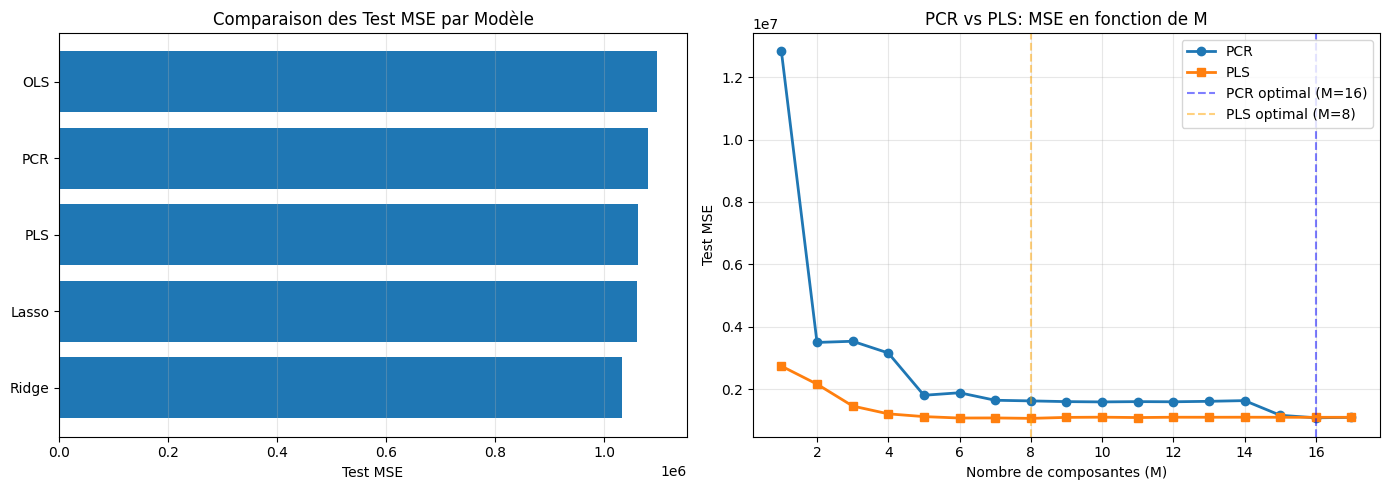

In [34]:
# Visualisation
fig, axes = subplots(1, 2, figsize=(14, 5))
# Graphique 1: Comparaison des MSE
axes[0].barh(results_df['Modèle'], results_df['Test MSE'])
axes[0].set_xlabel('Test MSE')
axes[0].set_title('Comparaison des Test MSE par Modèle')
axes[0].grid(axis='x', alpha=0.3)

# Graphique 2: MSE en fonction du nombre de composantes
axes[1].plot(range(1, n_components + 1), pcr_mse_cv, 'o-', label='PCR', linewidth=2)
axes[1].plot(range(1, n_components + 1), pls_mse_cv, 's-', label='PLS', linewidth=2)
axes[1].axvline(M_optimal_pcr, color='blue', linestyle='--', alpha=0.5, label=f'PCR optimal (M={M_optimal_pcr})')
axes[1].axvline(M_optimal_pls, color='orange', linestyle='--', alpha=0.5, label=f'PLS optimal (M={M_optimal_pls})')
axes[1].set_xlabel('Nombre de composantes (M)')
axes[1].set_ylabel('Test MSE')
axes[1].set_title('PCR vs PLS: MSE en fonction de M')
axes[1].legend()
axes[1].grid(alpha=0.3)

fig.tight_layout()
print("\n[Graphiques générés]")